# The Spark Foundation -GRIP -Data Science and Business Analytics -August'2021 

Task 1 : Prediction Using Supervised ML 
    
Author : Anuj Kumar Srivastava 
    
Problem Statement : In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.
 

In [1]:
# Let us first import the modules 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
 #Importing Labour Training evaluation Data.csv 
url = "http://bit.ly/w-data"
student = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


In [3]:
student.head(25)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
student.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
student.shape

(25, 2)

In [7]:
student.isnull().sum()

Hours     0
Scores    0
dtype: int64

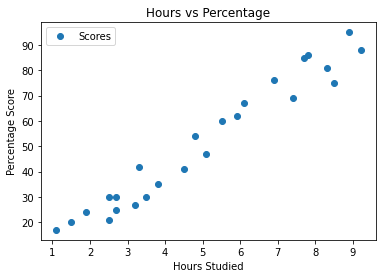

In [8]:
# Plotting the distribution of scores
student.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()


From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score

In [9]:
student.corr(method = "pearson")

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [10]:
#next step is to divide the data into "attributes" (inputs) and "labels" (outputs)
x = student.iloc[:,:-1].values
y = student.iloc[:,-1].values

we split this data into training and test sets by using Scikit-Learn's built-in train_test_split() method

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =  train_test_split(x,y, test_size = 0.3, random_state =100)

In [12]:
#next, we train our data
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train,y_train)

print("Training Completed") 

Training Completed


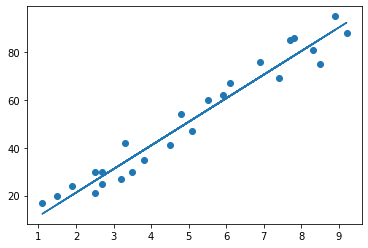

In [13]:
# Plotting the regression line
line = lm.coef_*x+lm.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

In [14]:
# Predicting the response for the test data
y_pred = lm.predict(x_test)
print(x_test)

[[2.7]
 [3.8]
 [3.3]
 [5.9]
 [1.5]
 [7.4]
 [6.9]
 [4.8]]


In [15]:
#we compare the actual and the predicted values 
df = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
df

,Actual,Predicted
0,25,28.148771
1,35,39.007657
2,42,34.071800
3,62,59.738257
4,20,16.302714
5,69,74.545829
6,76,69.609972
7,54,48.879371


Finally,we evaluate the performance of algorithm to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error and root mean squared error. There are many such metrics.

In [16]:
h=9.25
a=lm.predict([[h]])
print('if student studies for {} hours per day he/she is likely to score {}%'.format(h,*a))

if student studies for 9.25 hours per day he/she is likely to score 92.80850057353504%


In [17]:
from sklearn import metrics
print("Mean Absolute Error:",
     metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 4.762517892332275


In [18]:
from sklearn.metrics import r2_score
print("R2 Score:",r2_score(y_test,y_pred))

R2 Score: 0.9309458862687437


This implies 93% of variation is explained by the target variable and it seems to be high. The 
model has a fairly strong correlation and has successfully captured the variation of the target 
variable.